Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Number of outliers in age: 26


<ipython-input-8-b01925bfe1f1>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


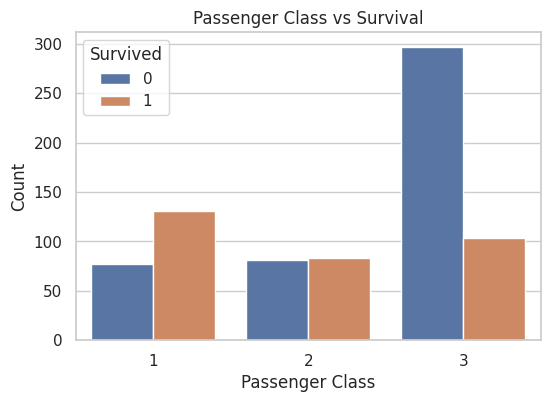

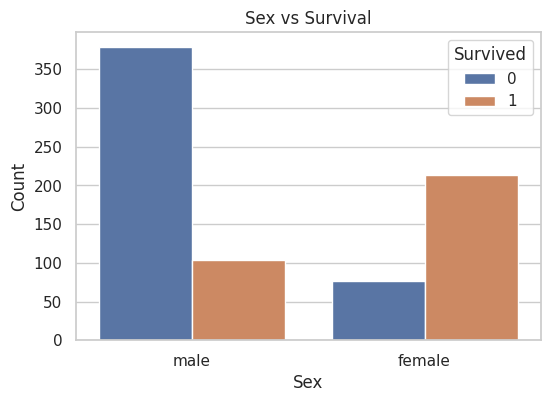

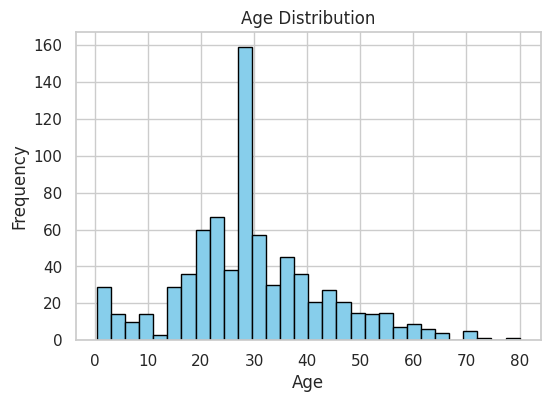

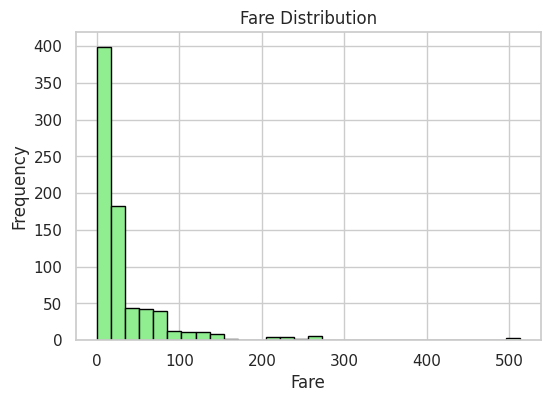

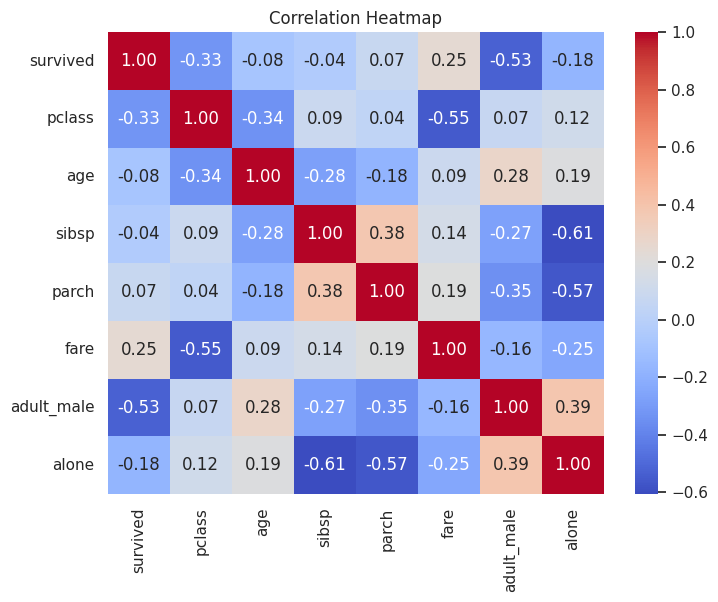


Summary of Key Insights:
- Age and Fare have significant variability; some outliers are present.
- Females had a higher survival rate than males.
- 1st class passengers were more likely to survive.
- Missing values in 'age' were imputed with the median.
- 'deck' column was dropped due to high missing data.
- Correlation shows 'fare' and 'pclass' relate to survival.


In [ ]:
# Titanic Dataset EDA and Visualization

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# ----------------------------
# 1. Data Cleaning
# ----------------------------

# Check for missing values
print("Missing Values:\n", titanic.isnull().sum())

# Fill missing 'age' with median
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Drop 'deck' due to many missing values
titanic.drop(columns='deck', inplace=True)

# Drop rows with missing 'embarked'
titanic.dropna(subset=['embarked'], inplace=True)

# Remove duplicates
titanic.drop_duplicates(inplace=True)

# Identify outliers in 'age' using IQR
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1
outliers = titanic[(titanic['age'] < Q1 - 1.5 * IQR) | (titanic['age'] > Q3 + 1.5 * IQR)]
print(f"\nNumber of outliers in age: {len(outliers)}")

# ----------------------------
# 2. Visualizations
# ----------------------------

# Set general style
sns.set(style="whitegrid")

# Bar Chart: Survival count by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic, x='pclass', hue='survived')
plt.title('Passenger Class vs Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

# Bar Chart: Survival by Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('Sex vs Survival')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

# Histogram: Age distribution
plt.figure(figsize=(6, 4))
titanic['age'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Histogram: Fare distribution
plt.figure(figsize=(6, 4))
titanic['fare'].hist(bins=30, color='lightgreen', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = titanic.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# ----------------------------
# 3. Summary of Insights
# ----------------------------

print("\nSummary of Key Insights:")
print("- Age and Fare have significant variability; some outliers are present.")
print("- Females had a higher survival rate than males.")
print("- 1st class passengers were more likely to survive.")
print("- Missing values in 'age' were imputed with the median.")
print("- 'deck' column was dropped due to high missing data.")
print("- Correlation shows 'fare' and 'pclass' relate to survival.")
